In [37]:
from IPython import display

# File Processing
import glob
import os
from os.path import isdir, join
from pathlib import Path
import sox

# Math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from scipy import signal
from scipy.io import wavfile

# Data Plotting and Visualizations
from PIL import Image
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

# Sklearn Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Tensorflow
import tensorflow as tf
from tensorflow.python.data import Dataset
import tensorflow_hub as hub

tf.logging.set_verbosity(tf.logging.ERROR)
tf.logging.set_verbosity(tf.logging.INFO)
pd.options.display.max_rows = 40
pd.options.display.float_format = '{:.2f}'.format

In [22]:
TRAIN_WAVFILES_PATH = './train/audio/'
TRAIN_SPECT_PATH = './train/spect/'
TRAIN_SPECT_TMP_PATH = './train/spect_tmp_2/'
PREDICTION_LABELS = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go", "unknown", "_background_noise_"]

In [3]:
subfolder_names_list = [x for x in os.listdir(TRAIN_WAVFILES_PATH) if os.path.isdir(TRAIN_WAVFILES_PATH + '/' + x)]

In [4]:
subfolder_names_list[8]

'_background_noise_'

In [5]:
def log_specgram(audio, sample_rate, window_size=20, step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio, fs=sample_rate, window='hann', 
                                        nperseg=nperseg, noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [6]:
def create_spectrogram_file(spect_path, tmp_path, subfolder, filename):
    tmp_img_path = tmp_path + subfolder + '/' + filename[:-4] + "_tmp.jpg"
    spect_img_path = spect_path + subfolder + '/' + filename[:-4] + "_spect.jpg"
    if subfolder not in PREDICTION_LABELS:
        tmp_img_path = tmp_path + 'unknown/' + filename[:-4] + "_tmp.jpg"
        spect_img_path = spect_path + 'unknown/' + filename[:-4] + "_spect.jpg"
    sample_rate, samples = wavfile.read(TRAIN_WAVFILES_PATH + subfolder + '/' + filename)
    _, spectrogram = log_specgram(samples, sample_rate)
    plt.imsave(tmp_img_path, spectrogram.T, origin='lower')
    spect_img = Image.open(tmp_img_path).resize([96,96])
    spect_img.save(spect_img_path)

In [7]:
bg_wav_files = [x for x in os.listdir(TRAIN_WAVFILES_PATH + subfolder_names_list[8]) if '.wav' in x]

In [64]:
wav_path = TRAIN_WAVFILES_PATH + '_background_noise_/' + bg_wav_files[1]

In [65]:
wav_path

'./train/audio/_background_noise_/exercise_bike.wav'

In [38]:
display.Audio(wav_path)

In [44]:
wav_cut_path = wav_path[:-4]+'_adjusted.wav'

In [45]:
wav_cut_path

'./train/audio/_background_noise_/pink_noise_adjusted.wav'

In [43]:
wav_cut_path = wav_path[:-4]+'_adjusted.wav'
tfm = sox.Transformer()
tfm.trim(0, 1)
tfm.build(wav_path, wav_cut_path)

True

In [67]:
display.Audio('./train/audio/_background_noise_/exercise_bike_45-46cut.wav')

In [51]:
sox.file_info.duration(wav_path)

60.0

In [60]:
wav_file_len = int(sox.file_info.duration(wav_path))
for i in range(wav_file_len):
    tfm = sox.Transformer()
    tfm.trim(i, i+1)
    wav_cut_path = wav_path[:-4]+'_'+str(i)+'-'+str(i+1)+'cut.wav'
    print(wav_cut_path)
    tfm.build(wav_path, wav_cut_path)

output_file: ./train/audio/_background_noise_/pink_noise_0-1cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_1-2cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_2-3cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_3-4cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_4-5cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_5-6cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_6-7cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_7-8cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_8-9cut.wav alre

./train/audio/_background_noise_/pink_noise_0-1cut.wav
./train/audio/_background_noise_/pink_noise_1-2cut.wav
./train/audio/_background_noise_/pink_noise_2-3cut.wav
./train/audio/_background_noise_/pink_noise_3-4cut.wav
./train/audio/_background_noise_/pink_noise_4-5cut.wav
./train/audio/_background_noise_/pink_noise_5-6cut.wav
./train/audio/_background_noise_/pink_noise_6-7cut.wav
./train/audio/_background_noise_/pink_noise_7-8cut.wav
./train/audio/_background_noise_/pink_noise_8-9cut.wav
./train/audio/_background_noise_/pink_noise_9-10cut.wav
./train/audio/_background_noise_/pink_noise_10-11cut.wav
./train/audio/_background_noise_/pink_noise_11-12cut.wav
./train/audio/_background_noise_/pink_noise_12-13cut.wav
./train/audio/_background_noise_/pink_noise_13-14cut.wav
./train/audio/_background_noise_/pink_noise_14-15cut.wav
./train/audio/_background_noise_/pink_noise_15-16cut.wav
./train/audio/_background_noise_/pink_noise_16-17cut.wav
./train/audio/_background_noise_/pink_noise_17-18c

output_file: ./train/audio/_background_noise_/pink_noise_22-23cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_23-24cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_24-25cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_25-26cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_26-27cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_27-28cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_28-29cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_29-30cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise

./train/audio/_background_noise_/pink_noise_22-23cut.wav
./train/audio/_background_noise_/pink_noise_23-24cut.wav
./train/audio/_background_noise_/pink_noise_24-25cut.wav
./train/audio/_background_noise_/pink_noise_25-26cut.wav
./train/audio/_background_noise_/pink_noise_26-27cut.wav
./train/audio/_background_noise_/pink_noise_27-28cut.wav
./train/audio/_background_noise_/pink_noise_28-29cut.wav
./train/audio/_background_noise_/pink_noise_29-30cut.wav
./train/audio/_background_noise_/pink_noise_30-31cut.wav
./train/audio/_background_noise_/pink_noise_31-32cut.wav
./train/audio/_background_noise_/pink_noise_32-33cut.wav
./train/audio/_background_noise_/pink_noise_33-34cut.wav
./train/audio/_background_noise_/pink_noise_34-35cut.wav
./train/audio/_background_noise_/pink_noise_35-36cut.wav
./train/audio/_background_noise_/pink_noise_36-37cut.wav
./train/audio/_background_noise_/pink_noise_37-38cut.wav
./train/audio/_background_noise_/pink_noise_38-39cut.wav
./train/audio/_background_noise

output_file: ./train/audio/_background_noise_/pink_noise_43-44cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_44-45cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_45-46cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_46-47cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_47-48cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_48-49cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_49-50cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise_50-51cut.wav already exists and will be overwritten on build
output_file: ./train/audio/_background_noise_/pink_noise

./train/audio/_background_noise_/pink_noise_43-44cut.wav
./train/audio/_background_noise_/pink_noise_44-45cut.wav
./train/audio/_background_noise_/pink_noise_45-46cut.wav
./train/audio/_background_noise_/pink_noise_46-47cut.wav
./train/audio/_background_noise_/pink_noise_47-48cut.wav
./train/audio/_background_noise_/pink_noise_48-49cut.wav
./train/audio/_background_noise_/pink_noise_49-50cut.wav
./train/audio/_background_noise_/pink_noise_50-51cut.wav
./train/audio/_background_noise_/pink_noise_51-52cut.wav
./train/audio/_background_noise_/pink_noise_52-53cut.wav
./train/audio/_background_noise_/pink_noise_53-54cut.wav
./train/audio/_background_noise_/pink_noise_54-55cut.wav
./train/audio/_background_noise_/pink_noise_55-56cut.wav
./train/audio/_background_noise_/pink_noise_56-57cut.wav
./train/audio/_background_noise_/pink_noise_57-58cut.wav
./train/audio/_background_noise_/pink_noise_58-59cut.wav
./train/audio/_background_noise_/pink_noise_59-60cut.wav


In [63]:
def get_one_sec_clips(wav_path):
    wav_file_len = int(sox.file_info.duration(wav_path))
    for i in range(wav_file_len):
        tfm = sox.Transformer()
        tfm.trim(i, i+1)
        wav_cut_path = wav_path[:-4]+'_'+str(i)+'-'+str(i+1)+'cut.wav'
        print("created %s" % wav_cut_path)
        tfm.build(wav_path, wav_cut_path)

In [66]:
get_one_sec_clips('./train/audio/_background_noise_/exercise_bike.wav')

created ./train/audio/_background_noise_/exercise_bike_0-1cut.wav
created ./train/audio/_background_noise_/exercise_bike_1-2cut.wav
created ./train/audio/_background_noise_/exercise_bike_2-3cut.wav
created ./train/audio/_background_noise_/exercise_bike_3-4cut.wav
created ./train/audio/_background_noise_/exercise_bike_4-5cut.wav
created ./train/audio/_background_noise_/exercise_bike_5-6cut.wav
created ./train/audio/_background_noise_/exercise_bike_6-7cut.wav
created ./train/audio/_background_noise_/exercise_bike_7-8cut.wav
created ./train/audio/_background_noise_/exercise_bike_8-9cut.wav
created ./train/audio/_background_noise_/exercise_bike_9-10cut.wav
created ./train/audio/_background_noise_/exercise_bike_10-11cut.wav
created ./train/audio/_background_noise_/exercise_bike_11-12cut.wav
created ./train/audio/_background_noise_/exercise_bike_12-13cut.wav
created ./train/audio/_background_noise_/exercise_bike_13-14cut.wav
created ./train/audio/_background_noise_/exercise_bike_14-15cut.wav

In [ ]:
#get random sampling of clips as sanity check

In [34]:
bg_tmp_path = './train/spect_tmp_bg/'
bg_spect_path = './train/spect_bg/'
for x in range(len(bg_wav_files)):
    create_spectrogram_file(bg_spect_path,bg_tmp_path,subfolder_names_list[8], bg_wav_files[x])
    print("%d of %d images processed" % (x + 1, len(bg_wav_files)))

1 of 6 images processed


/home/girlybit/anaconda3/lib/python3.5/site-packages/scipy/io/wavfile.py:221: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


2 of 6 images processed
3 of 6 images processed
4 of 6 images processed
5 of 6 images processed
6 of 6 images processed


In [38]:
bg_spects = [x for x in os.listdir(bg_path + subfolder_names_list[8]) if '.jpg' in x]

white_noise_spect.jpg


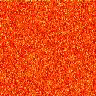

In [49]:
bg_image = bg_spects[0]
print(bg_image)
Image.open(bg_spect_path + subfolder_names_list[8] + '/' + bg_image)

doing_the_dishes_spect.jpg


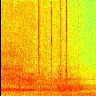

In [50]:
bg_image = bg_spects[1]
print(bg_image)
Image.open(bg_spect_path + subfolder_names_list[8] + '/' + bg_image)

pink_noise_spect.jpg


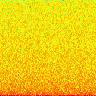

In [51]:
bg_image = bg_spects[2]
print(bg_image)
Image.open(bg_spect_path + subfolder_names_list[8] + '/' + bg_image)

exercise_bike_spect.jpg


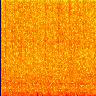

In [52]:
bg_image = bg_spects[3]
print(bg_image)
Image.open(bg_spect_path + subfolder_names_list[8] + '/' + bg_image)

dude_miaowing_spect.jpg


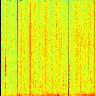

In [53]:
bg_image = bg_spects[4]
print(bg_image)
Image.open(bg_spect_path + subfolder_names_list[8] + '/' + bg_image)

running_tap_spect.jpg


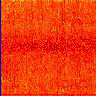

In [56]:
bg_image = bg_spects[5]
print(bg_image)
Image.open(bg_spect_path + subfolder_names_list[8] + '/' + bg_image)